# MARS segmentation pipeline

MARS is a 3D watershed based segmentation pipeline which uses automatic seed detection. Seed
locations are estimated from the minima of local intensity of the image (or the hminima parameter) which are then used for 3D watershed segmentation.

In [47]:
import os
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

from timagetk.components import SpatialImage
from timagetk.io import imread, imsave
from timagetk.plugins import h_transform, region_labeling, segmentation

from timagetk.visu.util import glasbey
from timagetk.visu.mplt import grayscale_imshow

In [34]:
# - MARS segmentation
# min_size parameter denoted the minimal cell volume (in um^3)
def mars_segmentation(img, hmin=2, sigma=0.4):
    # - Get the voxelsize
    vx = np.array(img.voxelsize)

    # - Filter the image prior the seed detection
    smooth_img = nd.gaussian_filter(img, sigma=sigma / vx).astype(img.dtype)
    smooth_img = SpatialImage(smooth_img, voxelsize=vx)

    # - Seed detection
    seed_img = h_transform(smooth_img, h=hmin, method='min')
    seed_img = region_labeling(seed_img, low_threshold=1, high_threshold=hmin, method='connected_components')

    # - Watershed segmentation
    seg_img = segmentation(smooth_img, seed_img, control='first', method='seeded_watershed')

    return seg_img, seed_img

Make sure to modify paths and filenames appropriately to match your file architecture.

In [35]:
dirname = os.path.dirname(os.getcwd()) + '/data/intensity/fm/orig/'
fname = 'original-44h.inr.gz'

Set and adjust h_min and sigma parameter

In [36]:
h_min = 2
sigma = 0.4 # in real unit (um)

In [37]:
# - Load the image
img = imread(dirname + fname)

# - Segment the image using MARS
seg_img, _ = mars_segmentation(img, hmin=h_min, sigma=sigma)

Loading image: /Users/manuelpett/Projects/seg_compare/data/intensity/fm/orig/original-44h.inr.gz
done in 0.45s


labelled_image.py - l.1120 - WARNING: Initializing from a 'LabelledImage' without 'class' entry in 'timagetk' metadata!


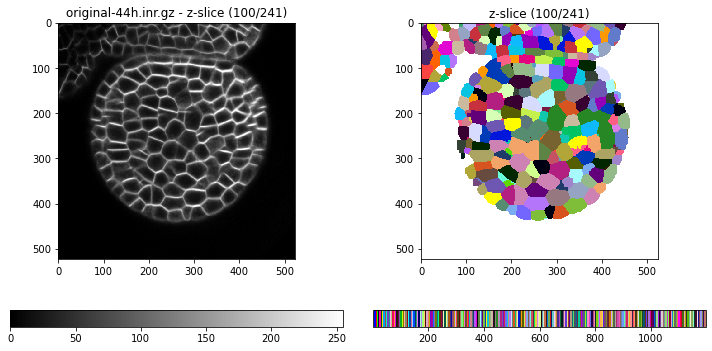

(<Figure size 720x360 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'original-44h.inr.gz - z-slice (100/241)'}>,
         <AxesSubplot:title={'center':'z-slice (100/241)'}>]], dtype=object))

In [45]:
# - Plot the results
z_slice = 100 # define the slice number
grayscale_imshow([img, seg_img], slice_id=z_slice, axis='z', cmap=['gray','glasbey'], val_range= ['auto','auto'])